# EDA

In [1]:
# import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in clean data csv
df = pd.read_csv('../data/ship_clean.csv', parse_dates=['order_date', 'shipping_date'])

In [3]:
# increasing max columns / rows display in Pandas
pd.set_option('display.max_rows', 1_000)
pd.set_option('display.max_columns', 500)

In [4]:
# inspect first 5 rows
df.head()

,type,actual_ship_days,estimated_ship_days,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_id,customer_segment,customer_state,customer_zipcode,department_name,latitude,longitude,market,order_city,order_country,order_date,order_id,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,order_region,order_state,order_status,product_card_id,product_name,product_price,shipping_date,shipping_mode,ship_performance,ontime,is_fraud,order_hour,order_before_noon,order_month,order_month_name,order_weekday,order_weekday_str,order_hour_str
0,DEBIT,3,4,Advance shipping,0,73,Sporting Goods,Caguas,20755,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,0.04,0.29,1,Southeast Asia,Java Occidental,COMPLETE,1360,Smart watch,327.75,2018-02-03 22:56:00,Standard Class,-1,1,0,22,0,1,Jan,2,2,22
1,TRANSFER,5,4,Late delivery,1,73,Sporting Goods,Caguas,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,0.05,-0.80,1,South Asia,Rajastán,PENDING,1360,Smart watch,327.75,2018-01-18 12:27:00,Standard Class,1,0,0,12,0,1,Jan,5,5,12
2,CASH,4,4,Shipping on time,0,73,Sporting Goods,San Jose,19491,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,2018-01-13 12:06:00,75938,0.06,-0.80,1,South Asia,Rajastán,CLOSED,1360,Smart watch,327.75,2018-01-17 12:06:00,Standard Class,0,1,0,12,0,1,Jan,5,5,12
3,DEBIT,3,4,Advance shipping,0,73,Sporting Goods,Los Angeles,19490,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,2018-01-13 11:45:00,75937,0.07,0.08,1,Oceania,Queensland,COMPLETE,1360,Smart watch,327.75,2018-01-16 11:45:00,Standard Class,-1,1,0,11,1,1,Jan,5,5,11
4,PAYMENT,2,4,Advance shipping,0,73,Sporting Goods,Caguas,19489,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,2018-01-13 11:24:00,75936,0.09,0.45,1,Oceania,Queensland,PENDING_PAYMENT,1360,Smart watch,327.75,2018-01-15 11:24:00,Standard Class,-2,1,0,11,1,1,Jan,5,5,11


In [5]:
# inspect columns and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   type                      180519 non-null  object        
 1   actual_ship_days          180519 non-null  int64         
 2   estimated_ship_days       180519 non-null  int64         
 3   delivery_status           180519 non-null  object        
 4   late_delivery_risk        180519 non-null  int64         
 5   category_id               180519 non-null  int64         
 6   category_name             180519 non-null  object        
 7   customer_city             180519 non-null  object        
 8   customer_id               180519 non-null  int64         
 9   customer_segment          180519 non-null  object        
 10  customer_state            180519 non-null  object        
 11  customer_zipcode          180516 non-null  float64       
 12  de

In [6]:
# reviewing numerical columns
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
actual_ship_days,180519.0,3.50,1.62,0.00,2.00,3.00,5.00,6.00
estimated_ship_days,180519.0,2.93,1.37,0.00,2.00,4.00,4.00,4.00
late_delivery_risk,180519.0,0.55,0.50,0.00,0.00,1.00,1.00,1.00
category_id,180519.0,31.85,15.64,2.00,18.00,29.00,45.00,76.00
customer_id,180519.0,6691.38,4162.92,1.00,3258.50,6457.00,9779.00,20757.00
customer_zipcode,180516.0,35921.13,37542.46,603.00,725.00,19380.00,78207.00,99205.00
latitude,180519.0,29.72,9.81,-33.94,18.27,33.14,39.28,48.78
longitude,180519.0,-84.92,21.43,-158.03,-98.45,-76.85,-66.37,115.26
order_id,180519.0,36221.89,21045.38,1.00,18057.00,36140.00,54144.00,77204.00
order_item_discount_rate,180519.0,0.10,0.07,0.00,0.04,0.10,0.16,0.25


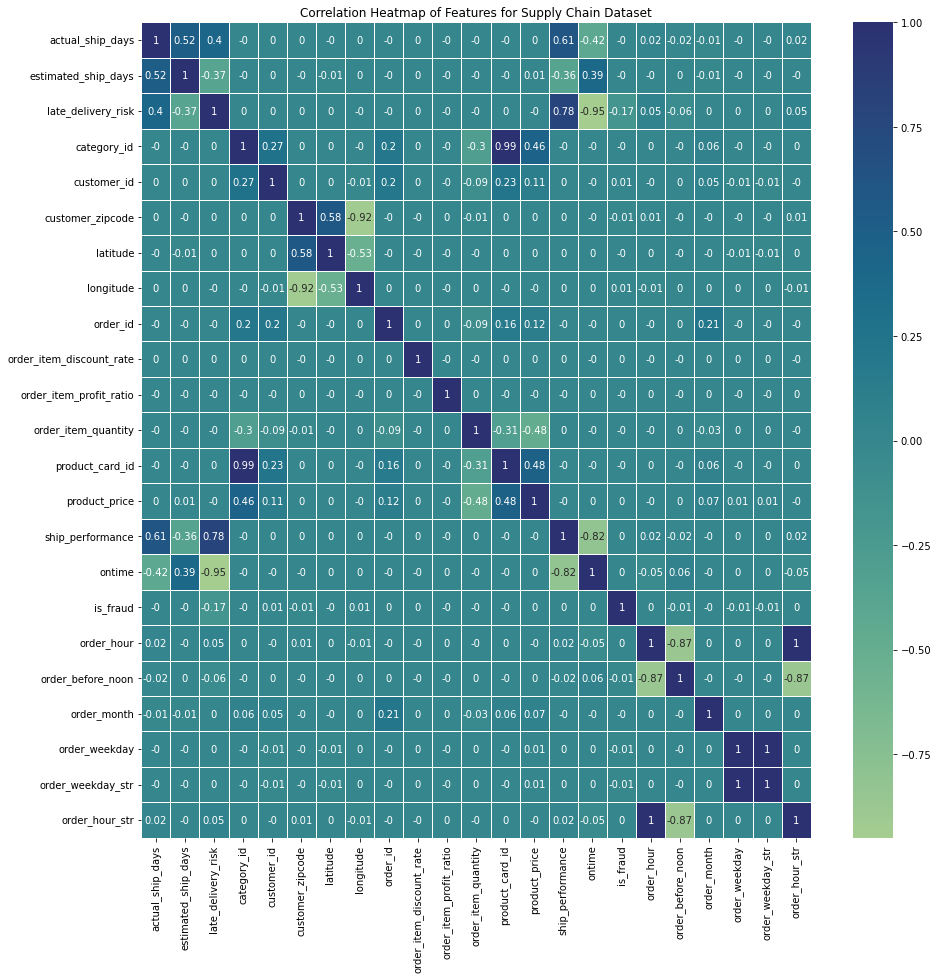

In [7]:
# checking a heatmap of feature correclation
corr = df.corr().round(2)
fig, ax = plt.subplots(figsize=(15,15))
plt.title('Correlation Heatmap of Features for Supply Chain Dataset')
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, cmap='crest');

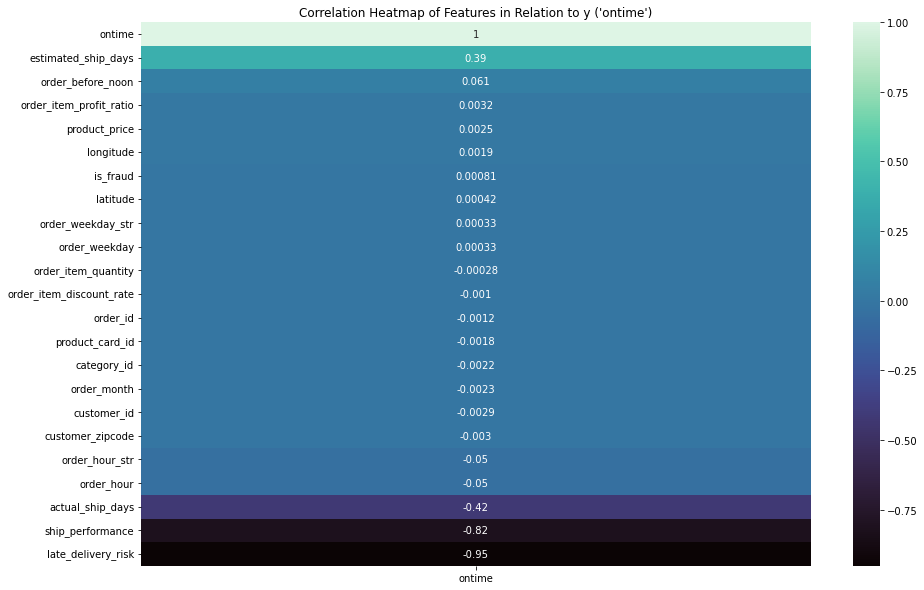

In [8]:
# narrowing heatmap to just correlations with the 'ontim' target
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap of Features in Relation to y ('ontime')")
sns.heatmap(df.corr()[['ontime']].sort_values(by='ontime', ascending=False), annot=True, cmap='mako');

## Time Series Analysis

In [9]:
df['shipping_mode'].value_counts()

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: shipping_mode, dtype: int64

In [10]:
df.loc[df['shipping_mode'] == 'Same Day'].groupby(df['order_date'].dt.hour)['ontime'].mean()


order_date
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
Name: ontime, dtype: float64

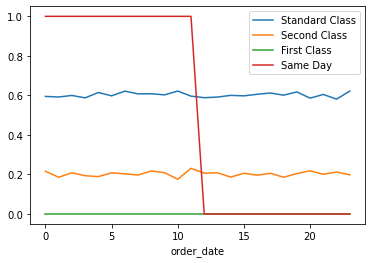

In [11]:
df.loc[df['shipping_mode'] == 'Standard Class'].groupby(df['order_date'].dt.hour)['ontime'].mean().plot(label = 'Standard Class')
df.loc[df['shipping_mode'] == 'Second Class'].groupby(df['order_date'].dt.hour)['ontime'].mean().plot(label = 'Second Class')
df.loc[df['shipping_mode'] == 'First Class'].groupby(df['order_date'].dt.hour)['ontime'].mean().plot(label = 'First Class')
df.loc[df['shipping_mode'] == 'Same Day'].groupby(df['order_date'].dt.hour)['ontime'].mean().plot(label = 'Same Day')
plt.legend();

---

# Understanding Shipping Performance

In [12]:
# percentages for on time vs late shipping
df['ontime'].value_counts(normalize = True)

0    0.572793
1    0.427207
Name: ontime, dtype: float64

In [13]:
# ship performance - number of days early / late shipping
df['ship_performance'].value_counts()

 1    60647
 0    33753
 2    28718
-1    21700
-2    21666
 3     7052
 4     6983
Name: ship_performance, dtype: int64

---

# Fraud

As a stretch goal we looked to see if we can predict fraud at the time of order. This analysis is included here, but was not ultimately used in the modeling phase as we did not have the billing information needed to properly identify fruadulent orders. 

In [14]:
# value counts of the different types of order status
df['order_status'].value_counts(normalize = False)

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: order_status, dtype: int64

In [15]:
# create a DataFrame for just orders cancelled for suspected fraud
fraud = df[df['order_status'] == 'SUSPECTED_FRAUD']
fraud.head(2)

,type,actual_ship_days,estimated_ship_days,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_id,customer_segment,customer_state,customer_zipcode,department_name,latitude,longitude,market,order_city,order_country,order_date,order_id,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,order_region,order_state,order_status,product_card_id,product_name,product_price,shipping_date,shipping_mode,ship_performance,ontime,is_fraud,order_hour,order_before_noon,order_month,order_month_name,order_weekday,order_weekday_str,order_hour_str
10,TRANSFER,6,2,Shipping canceled,0,73,Sporting Goods,Caguas,19483,Corporate,PR,725.0,Fitness,18.282845,-66.037056,Pacific Asia,Tokio,Japón,2018-01-13 09:18:00,75930,0.17,0.48,1,Eastern Asia,Tokio,SUSPECTED_FRAUD,1360,Smart watch,327.75,2018-01-19 09:18:00,Second Class,4,0,1,9,1,1,Jan,5,5,9
24,TRANSFER,2,2,Shipping canceled,0,73,Sporting Goods,Billings,19469,Corporate,MT,59102.0,Fitness,45.788311,-108.559410,Pacific Asia,Brisbane,Australia,2018-01-13 04:24:00,75916,0.12,0.31,1,Oceania,Queensland,SUSPECTED_FRAUD,1360,Smart watch,327.75,2018-01-15 04:24:00,Second Class,0,1,1,4,1,1,Jan,5,5,4


In [16]:
# list of the items most often included in fraudulent orders
fraud['product_name'].value_counts()

Perfect Fitness Perfect Rip Deck                 560
Nike Men's CJ Elite 2 TD Football Cleat          516
Nike Men's Dri-FIT Victory Golf Polo             481
O'Brien Men's Neoprene Life Vest                 439
Field & Stream Sportsman 16 Gun Fire Safe        394
Pelican Sunstream 100 Kayak                      329
Diamondback Women's Serene Classic Comfort Bi    305
Nike Men's Free 5.0+ Running Shoe                267
Under Armour Girls' Toddler Spine Surge Runni    223
Children's heaters                                18
Web Camera                                        16
DVDs                                              16
adidas Youth Germany Black/Red Away Match Soc     13
Glove It Imperial Golf Towel                      12
Fighting video games                              12
Porcelain crafts                                  12
Smart watch                                       12
Adult dog supplies                                11
First aid kit                                 

In [17]:
# anything cancelled or suspected of fraud will have a delivery status of 'Shipping cancelled'. Unsure why these are still showing a value for actual ship days
df.loc[df['delivery_status'] == 'Shipping canceled']['order_status'].value_counts()

SUSPECTED_FRAUD    4062
CANCELED           3692
Name: order_status, dtype: int64

In [18]:
# percentage of total shipments marked as potential fraud
df['is_fraud'].value_counts(normalize = True)

0    0.977498
1    0.022502
Name: is_fraud, dtype: float64

In [19]:
# fraudulent shipments per customer segment
df.groupby('customer_segment')['is_fraud'].mean()

customer_segment
Consumer       0.023689
Corporate      0.020661
Home Office    0.022187
Name: is_fraud, dtype: float64

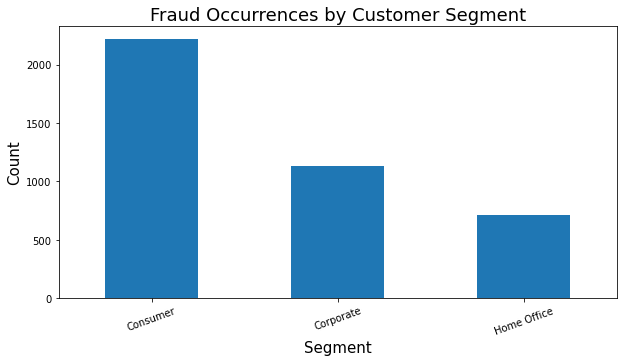

In [20]:
# fraud by customer segment
plt.figure(figsize=(10, 5))
fraud['customer_segment'].value_counts().plot(kind = 'bar')
plt.title('Fraud Occurrences by Customer Segment', fontsize = 18)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Segment', fontsize = 15)
plt.xticks(rotation=20);

In [21]:
# Puerto Rico is the source of the majority of fraud (~40%)
fraud['customer_city'].value_counts(normalize = True)[:10]

Caguas          0.389710
Chicago         0.019695
Los Angeles     0.017725
Brooklyn        0.013540
Philadelphia    0.010340
Bronx           0.010094
San Diego       0.010094
Las Vegas       0.008370
Miami           0.007878
New York        0.007632
Name: customer_city, dtype: float64

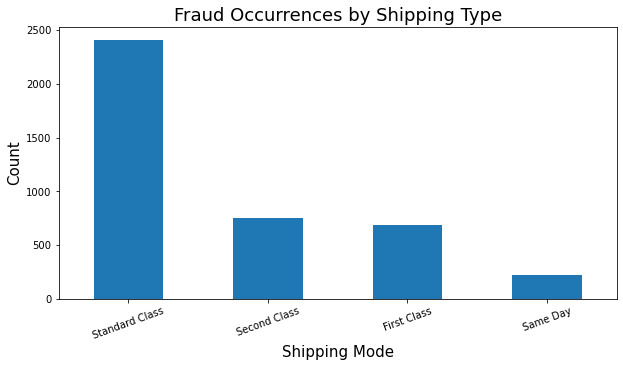

In [22]:
# shipping mode of fraudulent shipments
plt.figure(figsize=(10, 5))
fraud['shipping_mode'].value_counts().plot(kind = 'bar')
plt.title('Fraud Occurrences by Shipping Type', fontsize = 18)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Shipping Mode', fontsize = 15)
plt.xticks(rotation=20);

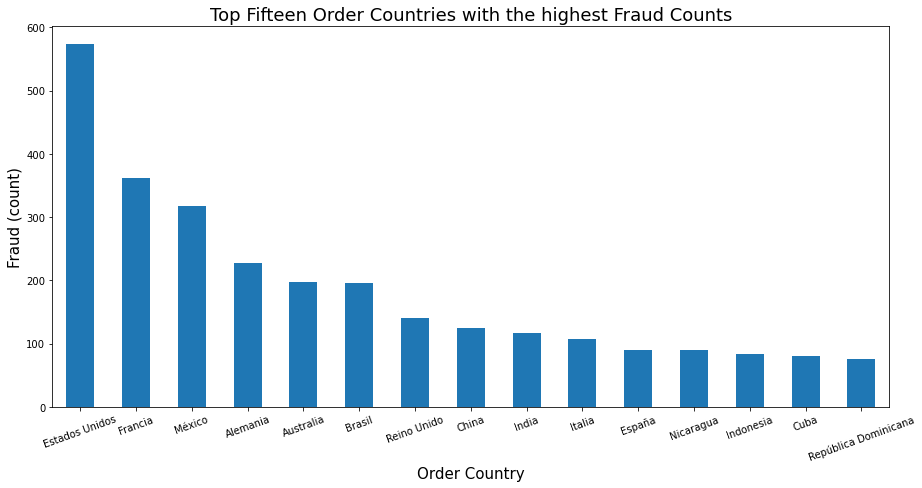

In [23]:
plt.figure(figsize=(15, 7))
fraud['order_country'].value_counts().nlargest(15).plot.bar()
plt.title('Top Fifteen Order Countries with the highest Fraud Counts', fontsize = 18)
plt.ylabel('Fraud (count)', fontsize = 15)
plt.xlabel('Order Country', fontsize = 15)
plt.xticks(rotation=20);

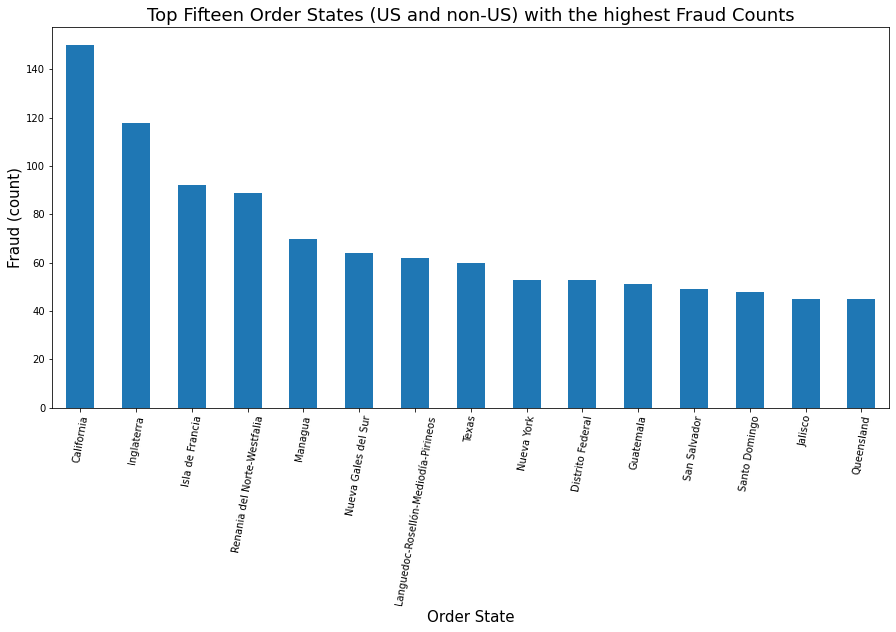

In [24]:
plt.figure(figsize=(15, 7))
fraud['order_state'].value_counts().nlargest(15).plot.bar()
plt.title('Top Fifteen Order States (US and non-US) with the highest Fraud Counts', fontsize = 18)
plt.ylabel('Fraud (count)', fontsize = 15)
plt.xlabel('Order State', fontsize = 15)
plt.xticks(rotation=80);

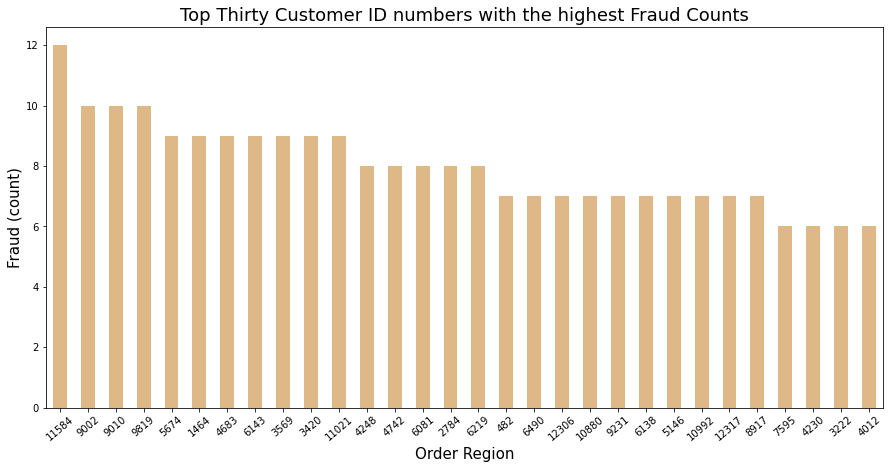

In [25]:
plt.figure(figsize=(15, 7))
fraud['customer_id'].value_counts().nlargest(30).plot.bar(color='burlywood')
plt.title('Top Thirty Customer ID numbers with the highest Fraud Counts', fontsize = 18)
plt.ylabel('Fraud (count)', fontsize = 15)
plt.xlabel('Order Region', fontsize = 15)
plt.xticks(rotation=40);

In [26]:
fraud.loc[fraud['customer_id'] == 9002]

,type,actual_ship_days,estimated_ship_days,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_id,customer_segment,customer_state,customer_zipcode,department_name,latitude,longitude,market,order_city,order_country,order_date,order_id,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,order_region,order_state,order_status,product_card_id,product_name,product_price,shipping_date,shipping_mode,ship_performance,ontime,is_fraud,order_hour,order_before_noon,order_month,order_month_name,order_weekday,order_weekday_str,order_hour_str
1007,TRANSFER,4,4,Shipping canceled,0,17,Cleats,New York,9002,Corporate,NY,10011.0,Apparel,40.739285,-73.998932,LATAM,Villa Canales,Guatemala,2017-02-05 20:17:00,52533,0.12,0.45,2,Central America,Guatemala,SUSPECTED_FRAUD,365,Perfect Fitness Perfect Rip Deck,59.990002,2017-02-09 20:17:00,Standard Class,0,1,1,20,0,2,Feb,6,6,20
1008,TRANSFER,4,4,Shipping canceled,0,17,Cleats,New York,9002,Corporate,NY,10011.0,Apparel,40.739285,-73.998932,LATAM,Villa Canales,Guatemala,2017-02-05 20:17:00,52533,0.13,0.50,2,Central America,Guatemala,SUSPECTED_FRAUD,365,Perfect Fitness Perfect Rip Deck,59.990002,2017-02-09 20:17:00,Standard Class,0,1,1,20,0,2,Feb,6,6,20
5159,TRANSFER,3,4,Shipping canceled,0,29,Shop By Sport,New York,9002,Corporate,NY,10011.0,Golf,40.739285,-73.998932,Europe,Paris,Francia,2017-09-01 01:05:00,66727,0.13,0.29,3,Western Europe,Isla de Francia,SUSPECTED_FRAUD,627,Under Armour Girls' Toddler Spine Surge Runni,39.990002,2017-09-04 01:05:00,Standard Class,-1,1,1,1,1,9,Sep,4,4,1
10023,TRANSFER,3,4,Shipping canceled,0,24,Women's Apparel,New York,9002,Corporate,NY,10011.0,Golf,40.739285,-73.998932,Europe,Paris,Francia,2017-09-01 01:05:00,66727,0.02,-0.20,4,Western Europe,Isla de Francia,SUSPECTED_FRAUD,502,Nike Men's Dri-FIT Victory Golf Polo,50.000000,2017-09-04 01:05:00,Standard Class,-1,1,1,1,1,9,Sep,4,4,1
10158,TRANSFER,4,4,Shipping canceled,0,9,Cardio Equipment,New York,9002,Corporate,NY,10011.0,Footwear,40.739285,-73.998932,LATAM,Villa Canales,Guatemala,2017-02-05 20:17:00,52533,0.00,0.28,4,Central America,Guatemala,SUSPECTED_FRAUD,191,Nike Men's Free 5.0+ Running Shoe,99.989998,2017-02-09 20:17:00,Standard Class,0,1,1,20,0,2,Feb,6,6,20
53172,TRANSFER,3,4,Shipping canceled,0,48,Water Sports,New York,9002,Corporate,NY,10011.0,Fan Shop,40.739285,-73.998932,Europe,Paris,Francia,2017-09-01 01:05:00,66727,0.03,-0.70,1,Western Europe,Isla de Francia,SUSPECTED_FRAUD,1073,Pelican Sunstream 100 Kayak,199.990005,2017-09-04 01:05:00,Standard Class,-1,1,1,1,1,9,Sep,4,4,1
86132,TRANSFER,4,4,Shipping canceled,0,43,Camping & Hiking,New York,9002,Corporate,NY,10011.0,Fan Shop,40.739285,-73.998932,LATAM,Villa Canales,Guatemala,2017-02-05 20:17:00,52533,0.05,0.29,1,Central America,Guatemala,SUSPECTED_FRAUD,957,Diamondback Women's Serene Classic Comfort Bi,299.980011,2017-02-09 20:17:00,Standard Class,0,1,1,20,0,2,Feb,6,6,20
115497,TRANSFER,3,4,Shipping canceled,0,45,Fishing,New York,9002,Corporate,NY,10011.0,Fan Shop,40.739285,-73.998932,Europe,Paris,Francia,2017-09-01 01:05:00,66727,0.15,-0.20,1,Western Europe,Isla de Francia,SUSPECTED_FRAUD,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2017-09-04 01:05:00,Standard Class,-1,1,1,1,1,9,Sep,4,4,1
115498,TRANSFER,3,4,Shipping canceled,0,45,Fishing,New York,9002,Corporate,NY,10011.0,Fan Shop,40.739285,-73.998932,Europe,Paris,Francia,2017-09-01 01:05:00,66727,0.16,0.46,1,Western Europe,Isla de Francia,SUSPECTED_FRAUD,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2017-09-04 01:05:00,Standard Class,-1,1,1,1,1,9,Sep,4,4,1
139326,TRANSFER,4,4,Shipping canceled,0,45,Fishing,New York,9002,Corporate,NY,10011.0,Fan Shop,40.739285,-73.998932,LATAM,Villa Canales,Guatemala,2017-02-05 20:17:00,52533,0.18,0.27,1,Central America,Guatemala,SUSPECTED_FRAUD,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2017-02-09 20:17:00,Standard Class,0,1,1,20,0,2,Feb,6,6,20


# Analysis of Shipping Performance

In [27]:
# creating a dataframe with cancelled shipments dropped
not_cancelled = df[df['delivery_status'] != 'Shipping canceled']
not_cancelled.head(2)

,type,actual_ship_days,estimated_ship_days,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_id,customer_segment,customer_state,customer_zipcode,department_name,latitude,longitude,market,order_city,order_country,order_date,order_id,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,order_region,order_state,order_status,product_card_id,product_name,product_price,shipping_date,shipping_mode,ship_performance,ontime,is_fraud,order_hour,order_before_noon,order_month,order_month_name,order_weekday,order_weekday_str,order_hour_str
0,DEBIT,3,4,Advance shipping,0,73,Sporting Goods,Caguas,20755,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,2018-01-31 22:56:00,77202,0.04,0.29,1,Southeast Asia,Java Occidental,COMPLETE,1360,Smart watch,327.75,2018-02-03 22:56:00,Standard Class,-1,1,0,22,0,1,Jan,2,2,22
1,TRANSFER,5,4,Late delivery,1,73,Sporting Goods,Caguas,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,0.05,-0.80,1,South Asia,Rajastán,PENDING,1360,Smart watch,327.75,2018-01-18 12:27:00,Standard Class,1,0,0,12,0,1,Jan,5,5,12


In [28]:
# ontime performance of shipments that haven't been cancelled
not_cancelled['ontime'].value_counts(normalize=True)

0    0.5729
1    0.4271
Name: ontime, dtype: float64

In [29]:
# review final delivery status
not_cancelled['delivery_status'].value_counts()

Late delivery       98977
Advance shipping    41592
Shipping on time    32196
Name: delivery_status, dtype: int64

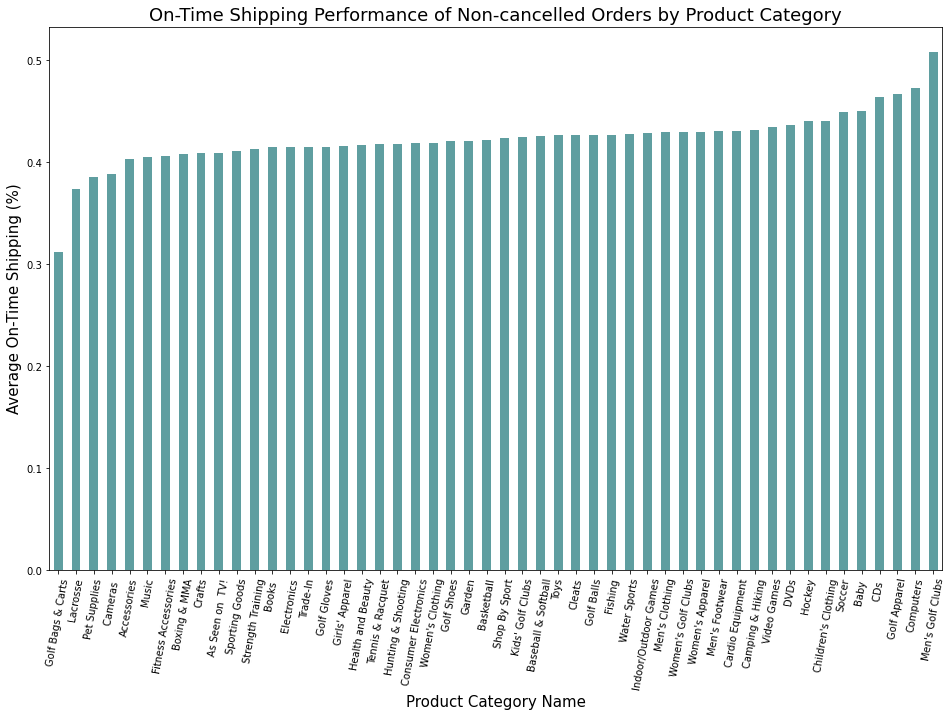

In [30]:
# shipping performance by product category
plt.figure(figsize=(16, 10))
not_cancelled.groupby('category_name')['ontime'].mean().sort_values().plot(kind = 'bar', color='cadetblue')
plt.title('On-Time Shipping Performance of Non-cancelled Orders by Product Category', fontsize = 18)
plt.ylabel('Average On-Time Shipping (%)', fontsize = 15)
plt.xlabel('Product Category Name', fontsize = 15)
plt.xticks(rotation=80);

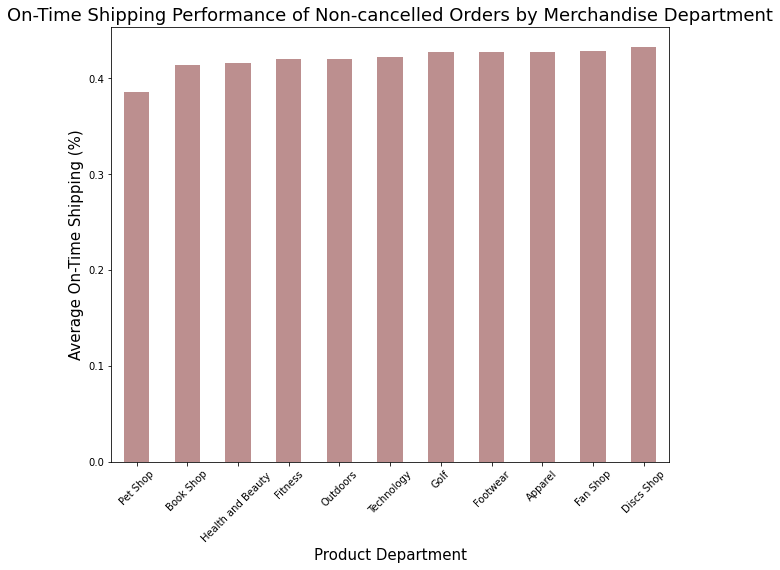

In [31]:
# shipping performance per product department
plt.figure(figsize=(10, 8))
not_cancelled.groupby('department_name')['ontime'].mean().sort_values().plot(kind = 'bar', color='rosybrown')
plt.title('On-Time Shipping Performance of Non-cancelled Orders by Merchandise Department', fontsize = 18)
plt.ylabel('Average On-Time Shipping (%)', fontsize = 15)
plt.xlabel('Product Department', fontsize = 15)
plt.xticks(rotation=45);

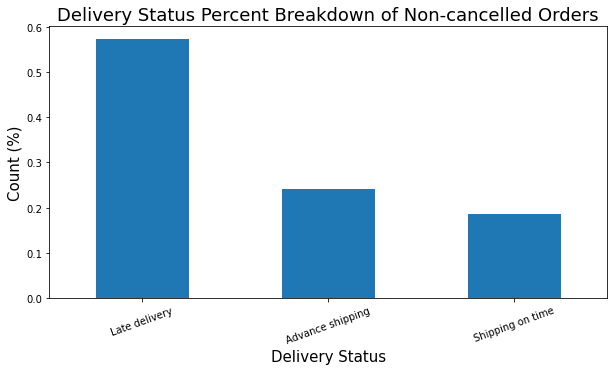

In [32]:
# review percent breakdown of final delivery status
plt.figure(figsize=(10, 5))
not_cancelled['delivery_status'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('Delivery Status Percent Breakdown of Non-cancelled Orders', fontsize = 18)
plt.ylabel('Count (%)', fontsize = 15)
plt.xlabel('Delivery Status', fontsize = 15)
plt.xticks(rotation=20);

(array([0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

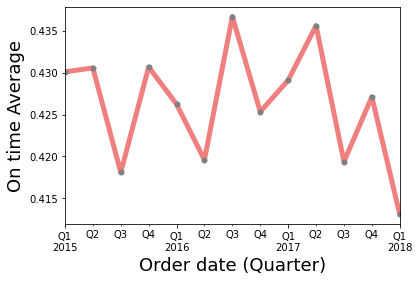

In [33]:
# per quarter breakdown of shipping performance reveals that it is largely static
data = df.groupby(pd.PeriodIndex(df['order_date'], freq= 'Q'))['ontime'].mean().plot(color='lightcoral', linewidth=5, linestyle='solid', marker='o', markeredgecolor='grey', markerfacecolor='grey', 
    markeredgewidth=2, markersize=4, markevery=1)
# plt.title('Order dates')
plt.xlabel('Order date (Quarter)', fontsize = 18)
plt.ylabel('On time Average', fontsize = 18)
plt.yticks(fontsize = 10)

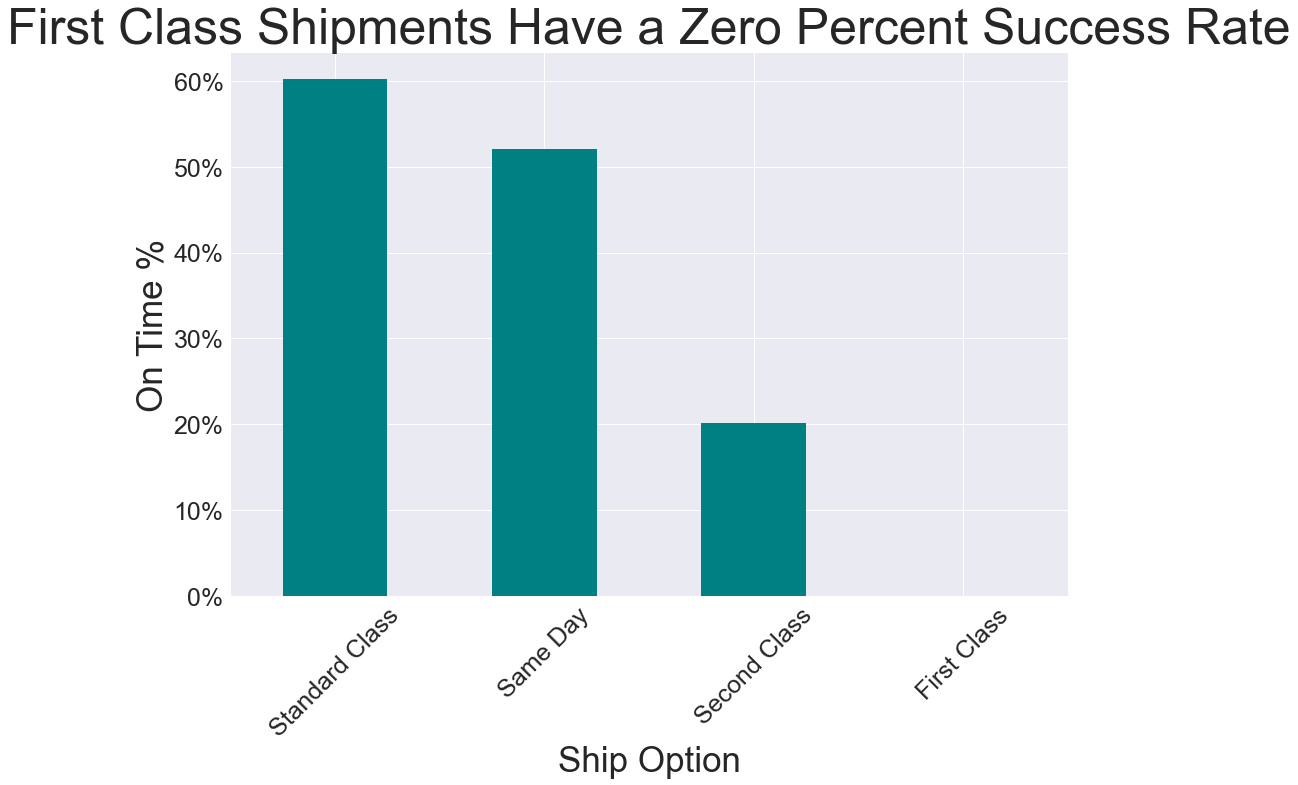

In [34]:
# breakdown of performance per ship speed
plt.style.use('seaborn')
plt.figure(figsize = (15,10))

not_cancelled.groupby('shipping_mode')['ontime'].mean().sort_values(ascending = False).plot(kind = 'bar', color='teal')

plt.xlabel('Ship Option', fontsize = 35)
plt.xticks(fontsize = 25, rotation=45)
plt.yticks(fontsize = 25, ticks=[0,.1,.2,.3,.4,.5,.6], labels=['0%', '10%', '20%', '30%', '40%', '50%', '60%'])
plt.ylabel('On Time %', fontsize = 35)
plt.title('First Class Shipments Have a Zero Percent Success Rate', fontsize = 50);

In [35]:
# estimated days for each of the ship speeds
df.groupby('shipping_mode')[['actual_ship_days', 'estimated_ship_days']].mean()

,actual_ship_days,estimated_ship_days
shipping_mode,,
First Class,2.000000,1.0
Same Day,0.478279,0.0
Second Class,3.990828,2.0
Standard Class,3.995907,4.0


In [36]:
# confirming that late delivery actually should be called late shipping as it's tied to the estimated and actual ship days
df[df['delivery_status'] == 'Late delivery']

,type,actual_ship_days,estimated_ship_days,delivery_status,late_delivery_risk,category_id,category_name,customer_city,customer_id,customer_segment,customer_state,customer_zipcode,department_name,latitude,longitude,market,order_city,order_country,order_date,order_id,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,order_region,order_state,order_status,product_card_id,product_name,product_price,shipping_date,shipping_mode,ship_performance,ontime,is_fraud,order_hour,order_before_noon,order_month,order_month_name,order_weekday,order_weekday_str,order_hour_str
1,TRANSFER,5,4,Late delivery,1,73,Sporting Goods,Caguas,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,2018-01-13 12:27:00,75939,0.05,-0.80,1,South Asia,Rajastán,PENDING,1360,Smart watch,327.750000,2018-01-18 12:27:00,Standard Class,1,0,0,12,0,1,Jan,5,5,12
6,DEBIT,2,1,Late delivery,1,73,Sporting Goods,Caguas,19487,Home Office,PR,725.0,Fitness,18.242538,-66.037056,Pacific Asia,Guangzhou,China,2018-01-13 10:42:00,75934,0.12,0.33,1,Eastern Asia,Guangdong,COMPLETE,1360,Smart watch,327.750000,2018-01-15 10:42:00,First Class,1,0,0,10,1,1,Jan,5,5,10
7,TRANSFER,2,1,Late delivery,1,73,Sporting Goods,Miami,19486,Corporate,FL,33162.0,Fitness,25.928869,-80.162872,Pacific Asia,Guangzhou,China,2018-01-13 10:21:00,75933,0.13,0.24,1,Eastern Asia,Guangdong,PROCESSING,1360,Smart watch,327.750000,2018-01-15 10:21:00,First Class,1,0,0,10,1,1,Jan,5,5,10
8,CASH,3,2,Late delivery,1,73,Sporting Goods,Caguas,19485,Corporate,PR,725.0,Fitness,18.233223,-66.037056,Pacific Asia,Guangzhou,China,2018-01-13 10:00:00,75932,0.15,0.48,1,Eastern Asia,Guangdong,CLOSED,1360,Smart watch,327.750000,2018-01-16 10:00:00,Second Class,1,0,0,10,1,1,Jan,5,5,10
9,CASH,2,1,Late delivery,1,73,Sporting Goods,San Ramon,19484,Corporate,CA,94583.0,Fitness,37.773991,-121.966629,Pacific Asia,Guangzhou,China,2018-01-13 09:39:00,75931,0.16,0.48,1,Eastern Asia,Guangdong,CLOSED,1360,Smart watch,327.750000,2018-01-15 09:39:00,First Class,1,0,0,9,1,1,Jan,5,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180507,PAYMENT,5,2,Late delivery,1,45,Fishing,Philadelphia,8247,Consumer,PA,19134.0,Fan Shop,39.986546,-75.108467,Pacific Asia,Hanoi,Vietnam,2016-01-16 09:16:00,26059,0.13,0.14,1,Southeast Asia,Th? Dô Hà N?i,PAYMENT_REVIEW,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2016-01-21 09:16:00,Second Class,3,0,0,9,1,1,Jan,5,5,9
180508,DEBIT,4,2,Late delivery,1,45,Fishing,Waipahu,8387,Corporate,HI,96797.0,Fan Shop,21.394211,-157.998016,Pacific Asia,Guangshui,China,2016-01-16 07:10:00,26053,0.15,0.25,1,Eastern Asia,Hubei,COMPLETE,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2016-01-20 07:10:00,Second Class,2,0,0,7,1,1,Jan,5,5,7
180512,DEBIT,6,4,Late delivery,1,45,Fishing,Caguas,7396,Home Office,PR,725.0,Fan Shop,18.245256,-66.370621,Pacific Asia,Chengdu,China,2016-01-16 06:07:00,26050,0.20,0.27,1,Eastern Asia,Sichuan,COMPLETE,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2016-01-22 06:07:00,Standard Class,2,0,0,6,1,1,Jan,5,5,6
180515,DEBIT,3,2,Late delivery,1,45,Fishing,Bakersfield,9141,Corporate,CA,93304.0,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,2016-01-16 01:34:00,26037,0.01,-1.55,1,Eastern Asia,Osaka,COMPLETE,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2016-01-19 01:34:00,Second Class,1,0,0,1,1,1,Jan,5,5,1


In [37]:
# trimming the number of columns from above
df[['shipping_mode', 'actual_ship_days', 'estimated_ship_days', 'order_date', 'shipping_date', 'delivery_status', 'late_delivery_risk']]

,shipping_mode,actual_ship_days,estimated_ship_days,order_date,shipping_date,delivery_status,late_delivery_risk
0,Standard Class,3,4,2018-01-31 22:56:00,2018-02-03 22:56:00,Advance shipping,0
1,Standard Class,5,4,2018-01-13 12:27:00,2018-01-18 12:27:00,Late delivery,1
2,Standard Class,4,4,2018-01-13 12:06:00,2018-01-17 12:06:00,Shipping on time,0
3,Standard Class,3,4,2018-01-13 11:45:00,2018-01-16 11:45:00,Advance shipping,0
4,Standard Class,2,4,2018-01-13 11:24:00,2018-01-15 11:24:00,Advance shipping,0
...,...,...,...,...,...,...,...
180514,Standard Class,4,4,2016-01-16 03:40:00,2016-01-20 03:40:00,Shipping on time,0
180515,Second Class,3,2,2016-01-16 01:34:00,2016-01-19 01:34:00,Late delivery,1
180516,Standard Class,5,4,2016-01-15 21:00:00,2016-01-20 21:00:00,Late delivery,1
180517,Standard Class,3,4,2016-01-15 20:18:00,2016-01-18 20:18:00,Advance shipping,0


In [38]:
# confirming that actual ship days is equal to delta of order date and shipping date
df[df['shipping_mode'] == 'First Class'][['actual_ship_days', 'order_date', 'shipping_date']]

,actual_ship_days,order_date,shipping_date
6,2,2018-01-13 10:42:00,2018-01-15 10:42:00
7,2,2018-01-13 10:21:00,2018-01-15 10:21:00
9,2,2018-01-13 09:39:00,2018-01-15 09:39:00
13,2,2018-01-13 08:15:00,2018-01-15 08:15:00
14,2,2018-01-13 07:54:00,2018-01-15 07:54:00
...,...,...,...
180442,2,2016-01-20 12:04:00,2016-01-22 12:04:00
180467,2,2016-01-18 19:05:00,2016-01-20 19:05:00
180470,2,2016-01-18 16:16:00,2016-01-20 16:16:00
180472,2,2016-01-18 12:04:00,2016-01-20 12:04:00


In [39]:
# broader overview of performance by ship type
not_cancelled.groupby('shipping_mode').mean()

,actual_ship_days,estimated_ship_days,late_delivery_risk,category_id,customer_id,customer_zipcode,latitude,longitude,order_id,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,product_card_id,product_price,ship_performance,ontime,is_fraud,order_hour,order_before_noon,order_month,order_weekday,order_weekday_str,order_hour_str
shipping_mode,,,,,,,,,,,,,,,,,,,,,,,
First Class,2.000000,1.0,1.000000,31.795911,6684.146004,35744.491362,29.640956,-84.855701,36175.680685,0.100963,0.127290,2.132312,691.484442,141.320052,1.000000,0.000000,0.0,11.630936,0.488515,6.339532,3.033342,3.033342,11.630936
Same Day,0.479285,0.0,0.479285,31.904659,6687.270634,36752.816421,30.101584,-85.508276,36532.410954,0.102181,0.117333,2.148929,693.893038,136.163898,0.479285,0.520715,0.0,11.220058,0.520715,6.245346,3.009039,3.009039,11.220058
Second Class,3.993167,2.0,0.798290,31.887032,6655.379518,36254.439626,29.833141,-85.008602,36151.930338,0.102054,0.118584,2.125362,693.146187,140.544882,1.993167,0.201710,0.0,11.467994,0.501390,6.204106,3.024641,3.024641,11.467994
Standard Class,3.993699,4.0,0.397691,31.856999,6699.343335,35799.922783,29.675803,-84.842115,36217.460365,0.101604,0.120172,2.125357,692.622822,141.969177,-0.006301,0.602309,0.0,11.472919,0.502981,6.218181,2.997964,2.997964,11.472919


In [40]:
# checking volume of total orders for each ship type
not_cancelled['shipping_mode'].value_counts()

Standard Class    103153
Second Class       33806
First Class        26513
Same Day            9293
Name: shipping_mode, dtype: int64

In [41]:
# overview of total number of shipments per customer state
not_cancelled['customer_state'].value_counts(normalize = False)

PR       66340
CA       27920
NY       10887
TX        8765
IL        7309
FL        5223
OH        3907
PA        3658
MI        3652
NJ        3027
AZ        2915
GA        2405
MD        2298
NC        1873
CO        1843
VA        1797
OR        1593
MA        1534
TN        1502
NV        1385
MO        1301
HI        1176
CT        1055
UT         933
NM         908
LA         891
WA         887
WI         813
SC         644
MN         626
IN         566
DC         547
KY         473
KS         449
DE         258
RI         241
WV         235
OK         226
ND         201
ID         162
AR         159
MT          77
IA          66
AL          35
95758        2
91732        1
Name: customer_state, dtype: int64

In [42]:
# percentage of orders for each region
not_cancelled['order_region'].value_counts(normalize = True)

Central America    0.157289
Western Europe     0.149724
South America      0.082100
Oceania            0.056337
Northern Europe    0.054455
Southeast Asia     0.052881
Southern Europe    0.052268
Caribbean          0.046022
West of USA        0.043961
South Asia         0.043151
Eastern Asia       0.040361
East of USA        0.038301
West Asia          0.033259
US Center          0.032721
South of  USA      0.022314
Eastern Europe     0.021908
West Africa        0.020670
North Africa       0.017862
East Africa        0.010309
Central Africa     0.009354
Southern Africa    0.006367
Canada             0.005250
Central Asia       0.003137
Name: order_region, dtype: float64

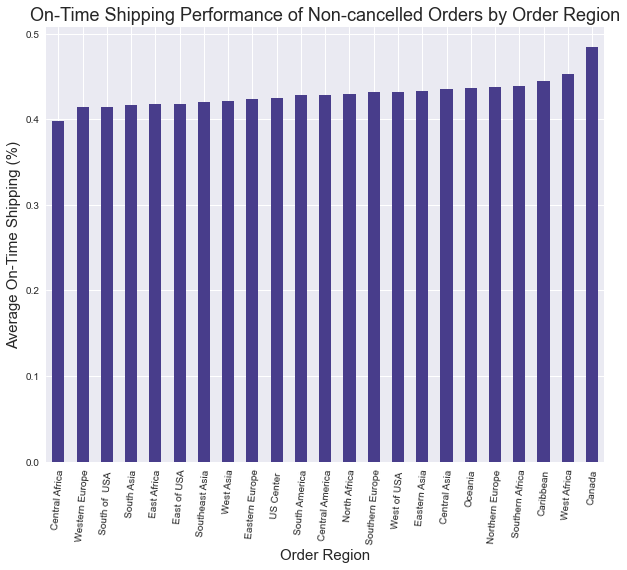

In [43]:
# ontime ship performance by region
plt.figure(figsize=(10, 8))
not_cancelled.groupby('order_region')['ontime'].mean().sort_values().plot(kind = 'bar', color='darkslateblue')
plt.title('On-Time Shipping Performance of Non-cancelled Orders by Order Region', fontsize = 18)
plt.ylabel('Average On-Time Shipping (%)', fontsize = 15)
plt.xlabel('Order Region', fontsize = 15)
plt.xticks(rotation=85);

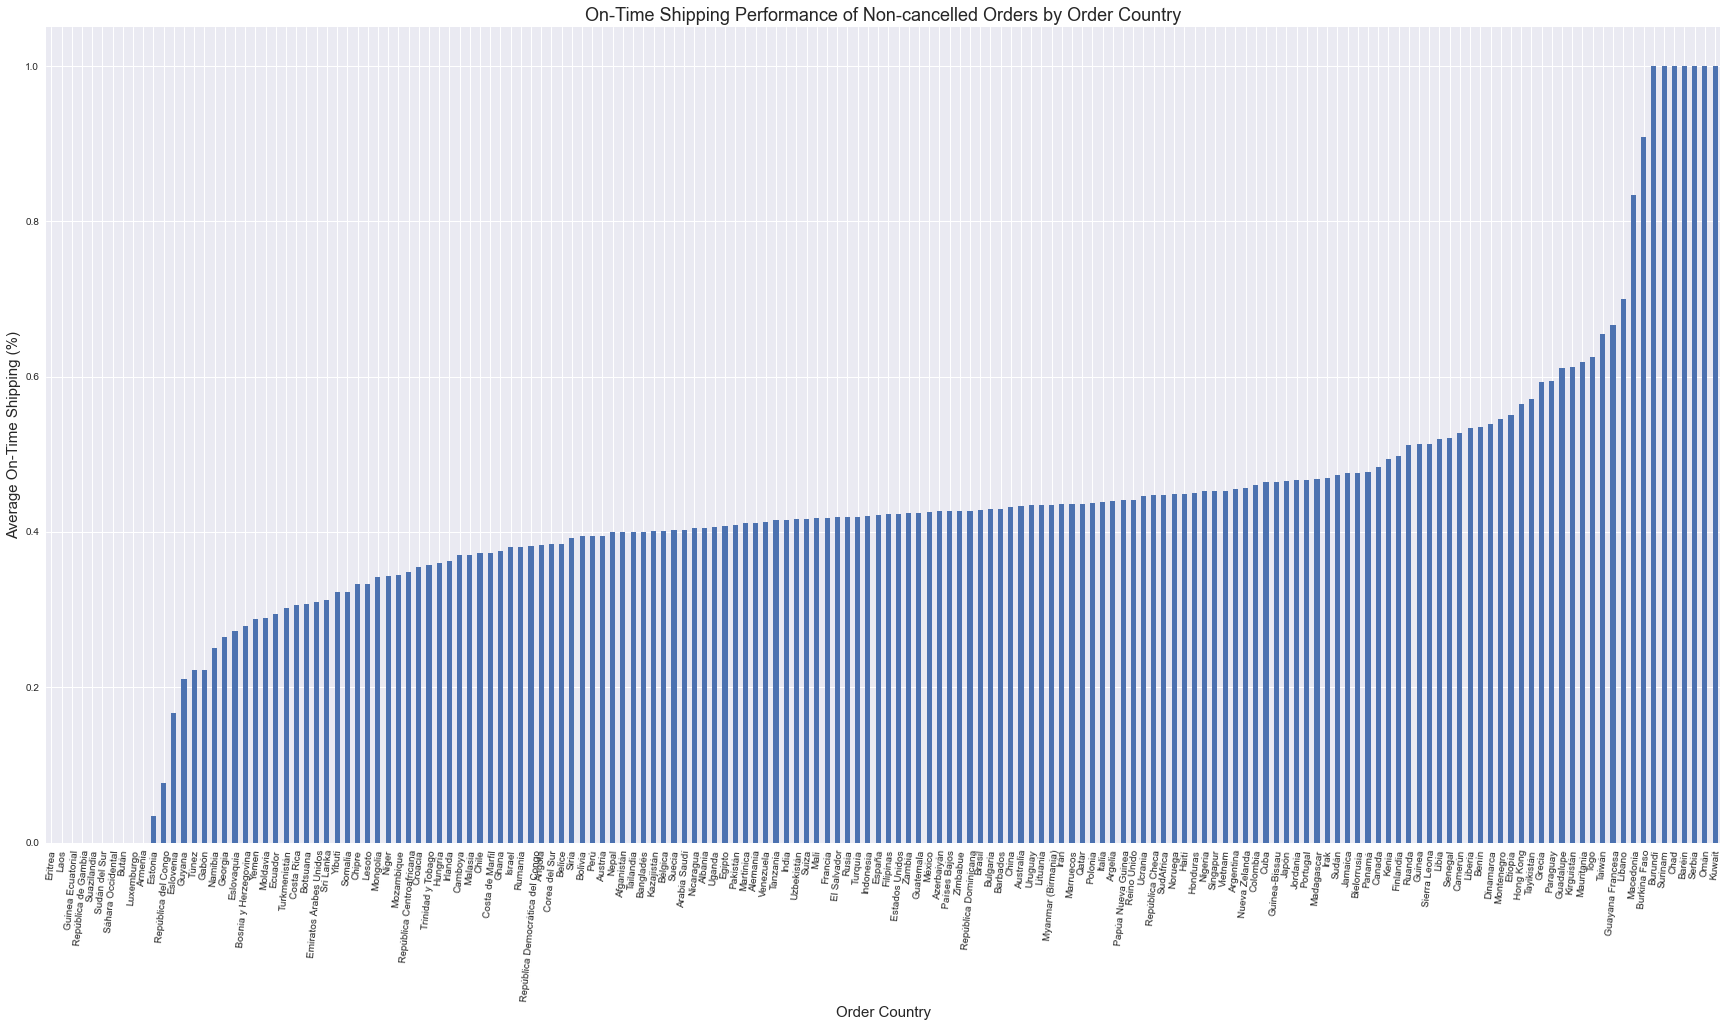

In [44]:
# ontime ship performance by country - unreadable
plt.figure(figsize=(30, 15))
not_cancelled.groupby('order_country')['ontime'].mean().sort_values().plot(kind = 'bar')
plt.title('On-Time Shipping Performance of Non-cancelled Orders by Order Country', fontsize = 18)
plt.ylabel('Average On-Time Shipping (%)', fontsize = 15)
plt.xlabel('Order Country', fontsize = 15)
plt.xticks(rotation=85);

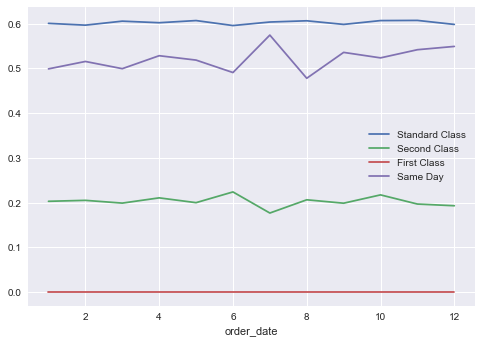

In [45]:
# order performance over time by ship method
df.loc[df['shipping_mode'] == 'Standard Class'].groupby(df['order_date'].dt.month)['ontime'].mean().plot(label = 'Standard Class')
df.loc[df['shipping_mode'] == 'Second Class'].groupby(df['order_date'].dt.month)['ontime'].mean().plot(label = 'Second Class')
df.loc[df['shipping_mode'] == 'First Class'].groupby(df['order_date'].dt.month)['ontime'].mean().plot(label = 'First Class')
df.loc[df['shipping_mode'] == 'Same Day'].groupby(df['order_date'].dt.month)['ontime'].mean().plot(label = 'Same Day')
plt.legend();

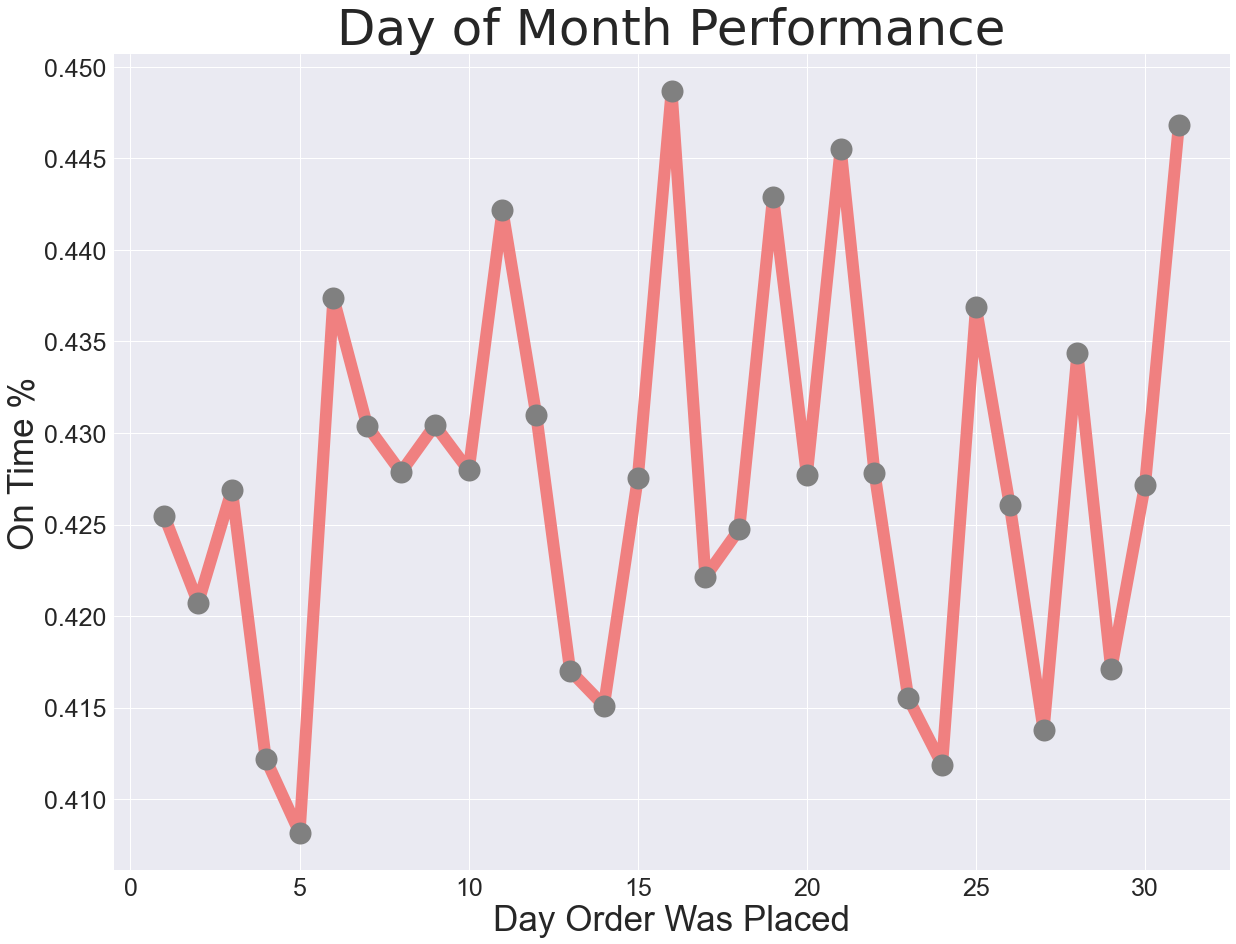

In [46]:
# seasonal performance
plt.figure(figsize = (20,15))
plt.style.use('seaborn')
csfont = {'fontname':'DejaVu Sans'}


data2 = df.groupby(df['order_date'].dt.day)['ontime'].mean().plot(
    color='lightcoral', linewidth=12, linestyle='solid', marker='o', markeredgecolor='grey', markerfacecolor='grey', 
    markeredgewidth=2, markersize=20, markevery=1)


plt.xlabel('Day Order Was Placed', fontsize = 35)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylabel('On Time %', fontsize = 35)
plt.title('Day of Month Performance', fontsize = 50, **csfont);

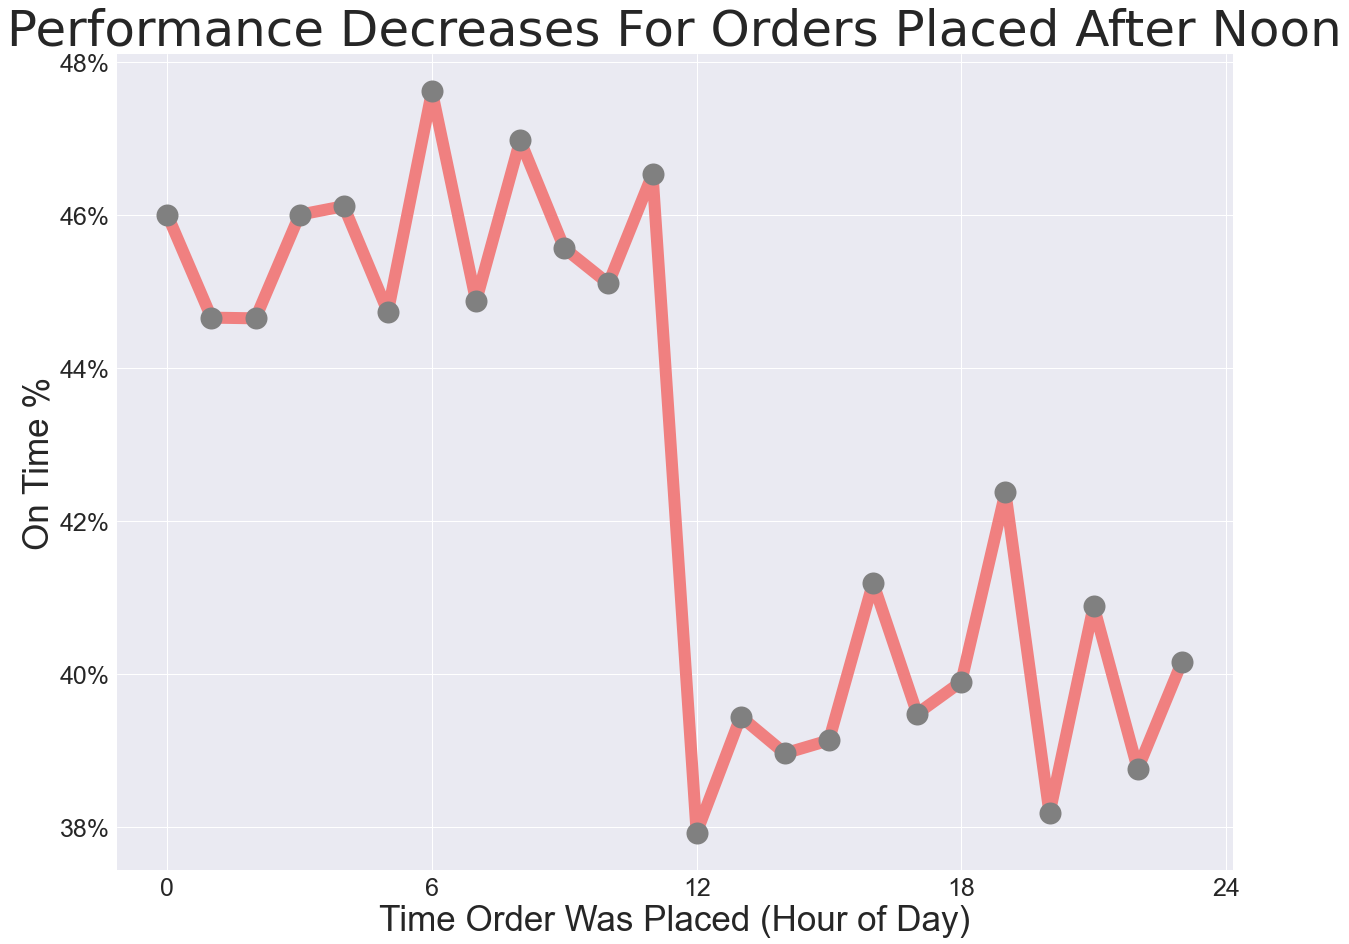

In [47]:
plt.figure(figsize = (20,15))
plt.style.use('seaborn')
csfont = {'fontname':'DejaVu Sans'}


data2 = df.groupby(df['order_date'].dt.hour)['ontime'].mean().plot(
    color='lightcoral', linewidth=12, linestyle='solid', marker='o', markeredgecolor='grey', markerfacecolor='grey', 
    markeredgewidth=2, markersize=20, markevery=1)


plt.xlabel('Time Order Was Placed (Hour of Day)', fontsize = 35)
plt.xticks(fontsize = 25, ticks = [0, 6, 12, 18, 24])
plt.yticks(fontsize = 25, ticks = [.38, .40, .42, .44, .46, .48], labels=['38%', '40%', '42%', '44%', '46%', '48%'])
plt.ylabel('On Time %', fontsize = 35)
plt.title('Performance Decreases For Orders Placed After Noon', fontsize = 50, **csfont);

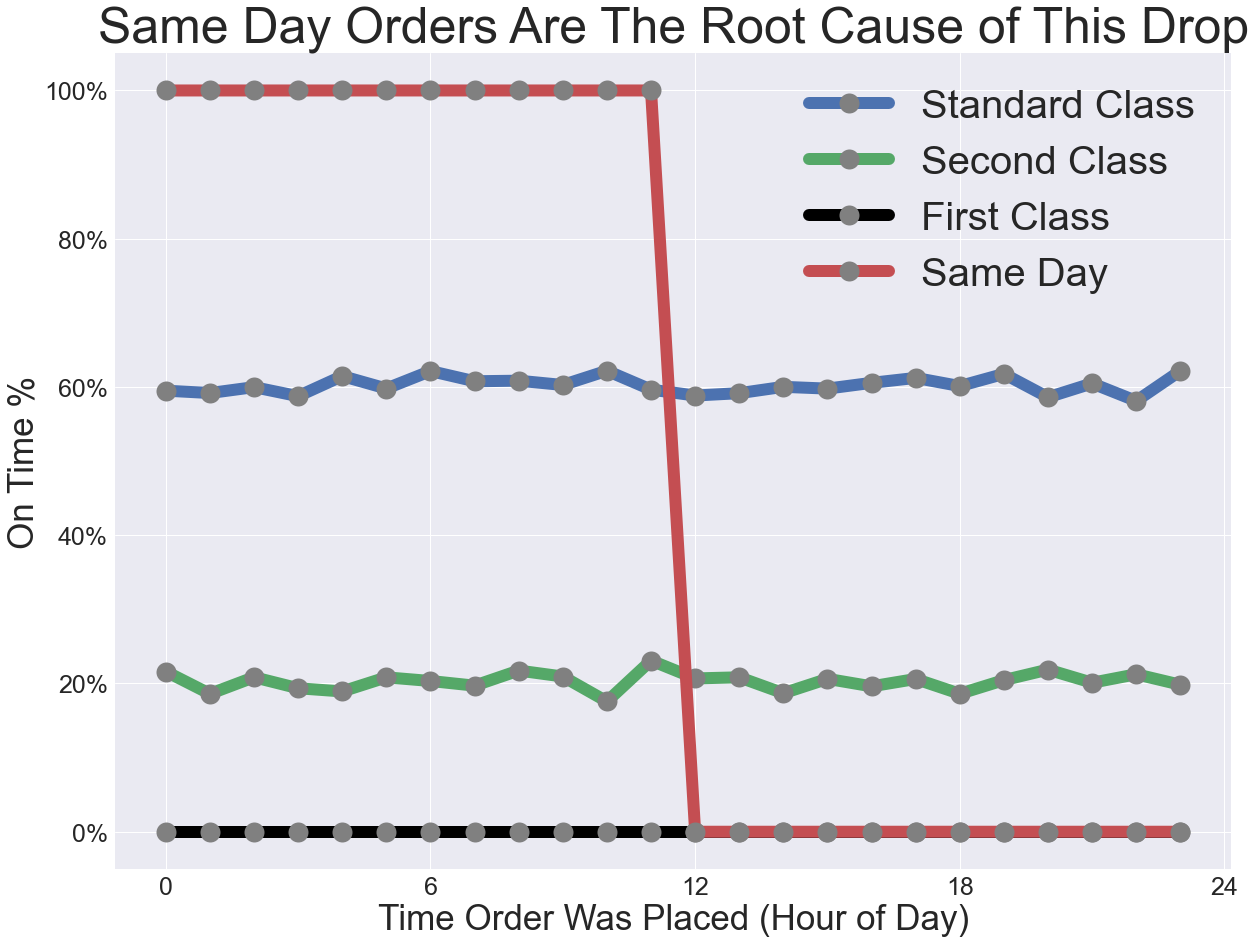

In [48]:
plt.figure(figsize = (20,15))
plt.style.use('seaborn')
csfont = {'fontname':'DejaVu Sans'}

df.loc[df['shipping_mode'] == 'Standard Class'].groupby(df['order_date'].dt.hour)['ontime'].mean().plot(label = 'Standard Class', linewidth=12, marker='o', markeredgecolor='grey', markerfacecolor='grey', markersize=20)
df.loc[df['shipping_mode'] == 'Second Class'].groupby(df['order_date'].dt.hour)['ontime'].mean().plot(label = 'Second Class', linewidth=12, marker='o', markeredgecolor='grey', markerfacecolor='grey', markersize=20)
df.loc[df['shipping_mode'] == 'First Class'].groupby(df['order_date'].dt.hour)['ontime'].mean().plot(label = 'First Class', color='black', linewidth=12, marker='o', markeredgecolor='grey', markerfacecolor='grey', markersize=20)
df.loc[df['shipping_mode'] == 'Same Day'].groupby(df['order_date'].dt.hour)['ontime'].mean().plot(label = 'Same Day', linewidth=12, marker='o', markeredgecolor='grey', markerfacecolor='grey', markersize=20)


plt.xlabel('Time Order Was Placed (Hour of Day)', fontsize = 35)
plt.xticks(fontsize = 25, ticks = [0, 6, 12, 18, 24])
plt.yticks(fontsize = 25, ticks = [0, .2, .4, .6, .8, 1], labels =['0%', '20%', '40%', '60%', '80%', '100%'])
plt.ylabel('On Time %', fontsize = 35)
plt.title('Same Day Orders Are The Root Cause of This Drop', fontsize = 50)
plt.legend(fontsize = 40);